## Stock returns how do they behave

Actually how does stock returns behave

1) shuffled drawdown
2) monte-carlo drawdown

3) note down caveats

In [1]:
import pandas_datareader.data as web
import pandas as pd
import numpy as np
import yfinance as yf
import quantstats as qs
yf.pdr_override()
import seaborn as sns
sns.set()


[*********************100%***********************]  1 of 1 completed


<AxesSubplot:xlabel='Date'>

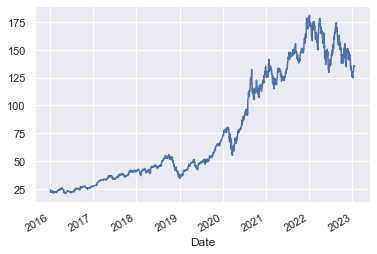

In [2]:
start_date = '2016-01-04'
df = web.get_data_yahoo(['AAPL'], start=start_date)
df['ret'] = df['Adj Close'].pct_change()
df['Adj Close'].plot()

In [3]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,ret
Date,,,,,,,
2016-01-04,25.652500,26.342501,25.500000,26.337500,24.111496,270597600,NaN
2016-01-05,26.437500,26.462500,25.602501,25.677500,23.507282,223164000,-0.025059
2016-01-06,25.139999,25.592501,24.967501,25.174999,23.047249,273829600,-0.019570
2016-01-07,24.670000,25.032499,24.107500,24.112499,22.074551,324377600,-0.042205
2016-01-08,24.637501,24.777500,24.190001,24.240000,22.191278,283192000,0.005288


In [4]:
def shuffled_prices(start_price, returns, index):
    np.random.shuffle(returns)
    s = start_price*(1+returns).cumprod()
    return pd.Series(s, index=index)

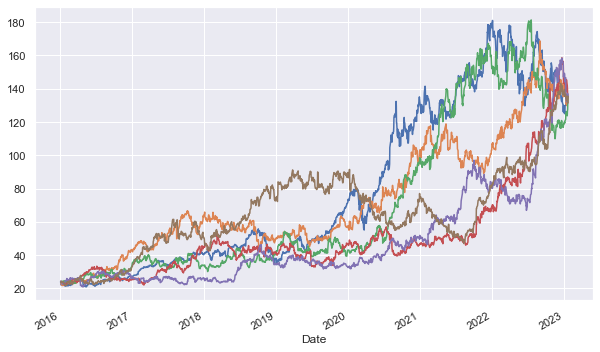

In [5]:
daily_returns = df.dropna()['ret'].values
start_value = df.iloc[0]['Adj Close']
index = df.index[1:] # since the first value is na we are excluding it
df['Adj Close'].plot(figsize=(10,6))
for i in range(5):
    s = shuffled_prices(start_value, daily_returns, index)
    s.plot()


In [6]:
def sampled_prices(start_price, returns, index):
    rets = np.random.choice(returns, size=len(returns))
    s = start_price*(1+rets).cumprod()
    return pd.Series(s, index=index)

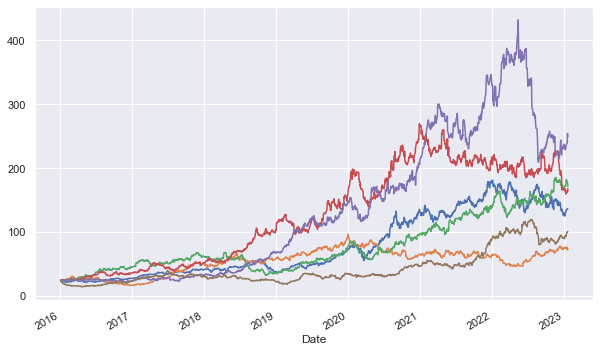

In [7]:
daily_returns = df.dropna()['ret'].values
start_value = df.iloc[0]['Adj Close']
index = df.index[1:] # since the first value is na we are excluding it
df['Adj Close'].plot(figsize=(10,6))
for i in range(5):
    s = sampled_prices(start_value, daily_returns, index)
    s.plot()
